In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point
import pandas as pd

# VARIABLES

In [40]:
#Read Combined ACS data
ACS_Comb=pd.read_csv('BlockGroup/ACS_Combined.csv')
ACS_Comb.head()

,Unnamed: 0,GEO.id,HD01_VD01_x,HD01_VD01_y,HD01_VD01,HD01_VD22,HD01_VD23,GEO.id2,GEO.display-label,Alternate Commuters
0,1,1500000US080130121011,856,87205,470,209,160,8.013012e+10,"Block Group 1, Census Tract 121.01, Boulder Co...",124
1,2,1500000US080130121012,1518,121174,619,376,372,8.013012e+10,"Block Group 2, Census Tract 121.01, Boulder Co...",100
2,3,1500000US080130121013,1202,80288,554,195,342,8.013012e+10,"Block Group 3, Census Tract 121.01, Boulder Co...",193
3,4,1500000US080130121014,1277,91250,480,242,289,8.013012e+10,"Block Group 4, Census Tract 121.01, Boulder Co...",188
4,5,1500000US080130121021,1715,43929,868,456,265,8.013012e+10,"Block Group 1, Census Tract 121.02, Boulder Co...",471


# MERGING ACS DATA WITH BLOCK GROUP SHP FILE

In [41]:
#Reading the BG file
BG = gp.read_file('BlockGroup/AllStates.shp',crs ='crs')
BG.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Shape_Leng,Shape_Area,geometry
0,1,47,009,011501,1,1500000US470090115011,470090115011,1,BG,120135751.0,5037243.0,0.999419,0.012454,"POLYGON ((-84.09721700026432 35.6050459997731,..."
1,2,47,035,970400,3,1500000US470359704003,470359704003,3,BG,7891146.0,5500.0,0.131861,0.000789,"POLYGON ((-85.03021600036806 35.9542880000912,..."
2,3,47,157,020621,4,1500000US471570206214,471570206214,4,BG,1363764.0,0.0,0.055195,0.000136,POLYGON ((-89.87979600008532 35.18831699982974...
3,4,47,157,005600,1,1500000US471570056001,471570056001,1,BG,1130051.0,0.0,0.050674,0.000110,POLYGON ((-90.05298900004226 35.10153599988655...
4,5,47,157,001300,3,1500000US471570013003,471570013003,3,BG,337983.0,0.0,0.023728,0.000033,POLYGON ((-89.95582799986227 35.15479699998161...


In [42]:
#Merging BG and DATA
FINAL = pd.merge(BG, ACS_Comb, how = 'left', left_on = "AFFGEOID", right_on = "GEO.id")
FINAL.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,...,Unnamed: 0,GEO.id,HD01_VD01_x,HD01_VD01_y,HD01_VD01,HD01_VD22,HD01_VD23,GEO.id2,GEO.display-label,Alternate Commuters
0,1,47,009,011501,1,1500000US470090115011,470090115011,1,BG,120135751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,47,035,970400,3,1500000US470359704003,470359704003,3,BG,7891146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,47,157,020621,4,1500000US471570206214,471570206214,4,BG,1363764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,47,157,005600,1,1500000US471570056001,471570056001,1,BG,1130051.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,47,157,001300,3,1500000US471570013003,471570013003,3,BG,337983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
FINAL.geometry.head()

0    POLYGON ((-84.09721700026432 35.6050459997731,...
1    POLYGON ((-85.03021600036806 35.9542880000912,...
2    POLYGON ((-89.87979600008532 35.18831699982974...
3    POLYGON ((-90.05298900004226 35.10153599988655...
4    POLYGON ((-89.95582799986227 35.15479699998161...
Name: geometry, dtype: object

In [44]:
FINAL = gp.GeoDataFrame(FINAL)

In [45]:
FINAL.geometry.head()

0    POLYGON ((-84.09721700026432 35.6050459997731,...
1    POLYGON ((-85.03021600036806 35.9542880000912,...
2    POLYGON ((-89.87979600008532 35.18831699982974...
3    POLYGON ((-90.05298900004226 35.10153599988655...
4    POLYGON ((-89.95582799986227 35.15479699998161...
Name: geometry, dtype: object

# BUFFER AROUND BIKESHARE STATIONS

In [21]:
# read 0.1mi buffer as a shapefile
#buffer = gp.read_file('Buffer/Buffer.shp')
#buffer.head()

In [22]:
#buffer.crs = FINAL.crs

In [23]:
#FINAL.crs

# INTERSECT TRIP DATA AND ACS DATA

In [46]:
Stations = gp.read_file('BlockGroup/AllTrip_LEHD/Trips_LEHD.shp')
Stations.head()

,No,State,StationID,Address,Latitude,Longitude,Total_Annu,Average_Mo,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC_SC,EMP_WAC_SC,LEISER_RAC,LEISER_WAC,OTHER_RAC_,OTHER_WAC_,RETAIL_RAC,RETAIL_WAC,geometry
0,1.0,TN,1297.0,100 Manufacturers Rd,35.063014,-85.310469,902.0,75.0,309.706646,2411.890909,1501.413903,11835.767260,209.713621,2902.630687,806.885655,3718.719232,175.107980,2802.526426,POINT (-85.310469 35.063014)
1,2.0,TN,1299.0,200 River St,35.061410,-85.306574,3021.0,252.0,386.346828,603.334567,1505.138816,8207.315858,172.288715,3417.190511,824.678363,2699.840580,121.824910,1486.950201,POINT (-85.306574 35.06141)
2,3.0,TN,1301.0,301 Manufacturers Rd,35.063304,-85.315211,139.0,12.0,342.674325,464.437318,1489.317280,12744.235340,238.540230,835.813516,735.360936,8761.915069,172.741789,2682.069437,POINT (-85.31521100000001 35.063304)
3,4.0,TN,1303.0,215 Broad St,35.053928,-85.310925,1295.0,108.0,261.591809,193.817184,1460.014281,31396.203960,144.378746,18073.677970,936.749630,11619.216850,117.294096,1509.491957,POINT (-85.310925 35.053928)
4,5.0,TN,1305.0,Market St & E 14th St,35.036904,-85.307269,785.0,65.0,779.081044,324.847939,3000.334382,14436.939330,320.696613,5741.777256,1633.737807,7832.501386,266.818918,537.812747,POINT (-85.30726900000001 35.036904)


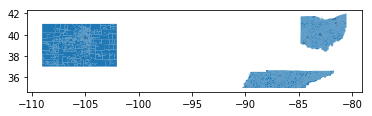

In [47]:
FINAL.plot()

In [26]:
#FINAL2 = FINAL.to_crs(Stations.crs)

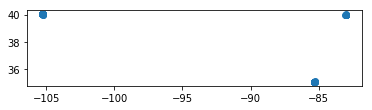

In [48]:
Stations.plot()

In [49]:
data = gp.sjoin(Stations,FINAL,how = 'left',op = 'within')

In [50]:
data.head()

,No,State,StationID,Address,Latitude,Longitude,Total_Annu,Average_Mo,EDHLTH_RAC,EDHLTH_WAC,...,Unnamed: 0,GEO.id,HD01_VD01_x,HD01_VD01_y,HD01_VD01,HD01_VD22,HD01_VD23,GEO.id2,GEO.display-label,Alternate Commuters
0,1.0,TN,1297.0,100 Manufacturers Rd,35.063014,-85.310469,902.0,75.0,309.706646,2411.890909,...,1097.0,1500000US470650008001,1632.0,41083,904.0,259.0,102.0,4.710000e+11,"Block Group 1, Census Tract 8, Hamilton County...",59.0
1,2.0,TN,1299.0,200 River St,35.061410,-85.306574,3021.0,252.0,386.346828,603.334567,...,1092.0,1500000US470650006003,877.0,71944,574.0,332.0,63.0,4.710000e+11,"Block Group 3, Census Tract 6, Hamilton County...",22.0
2,3.0,TN,1301.0,301 Manufacturers Rd,35.063304,-85.315211,139.0,12.0,342.674325,464.437318,...,1097.0,1500000US470650008001,1632.0,41083,904.0,259.0,102.0,4.710000e+11,"Block Group 1, Census Tract 8, Hamilton County...",59.0
3,4.0,TN,1303.0,215 Broad St,35.053928,-85.310925,1295.0,108.0,261.591809,193.817184,...,1133.0,1500000US470650031001,1658.0,29837,1009.0,344.0,77.0,4.710000e+11,"Block Group 1, Census Tract 31, Hamilton Count...",195.0
4,5.0,TN,1305.0,Market St & E 14th St,35.036904,-85.307269,785.0,65.0,779.081044,324.847939,...,1332.0,1500000US470650124003,2475.0,20536,522.0,132.0,61.0,4.710000e+11,"Block Group 3, Census Tract 124, Hamilton Coun...",310.0


In [53]:
TripsPM=pd.read_csv('BlockGroup/Bike Data/TripsPM.csv')
TripsPM.head()

,Station Name,Month,Ridership
0,11th & Pearl,17-Apr,272
1,11th & Pearl,17-Aug,557
2,11th & Pearl,17-Dec,139
3,11th & Pearl,17-Feb,159
4,11th & Pearl,17-Jan,137


In [55]:
dff = pd.merge(TripsPM, data, how = 'left', left_on = "Station Name", right_on = "Address")
dff

,Station Name,Month,Ridership,No,State,StationID,Address,Latitude,Longitude,Total_Annu,...,Unnamed: 0,GEO.id,HD01_VD01_x,HD01_VD01_y,HD01_VD01,HD01_VD22,HD01_VD23,GEO.id2,GEO.display-label,Alternate Commuters
0,11th & Pearl,17-Apr,272,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
1,11th & Pearl,17-Aug,557,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
2,11th & Pearl,17-Dec,139,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
3,11th & Pearl,17-Feb,159,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
4,11th & Pearl,17-Jan,137,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
5,11th & Pearl,17-Jul,598,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
6,11th & Pearl,17-Jun,536,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
7,11th & Pearl,17-Mar,261,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
8,11th & Pearl,17-May,352,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0
9,11th & Pearl,17-Nov,203,79.0,CO,101.0,11th & Pearl,40.017535,-105.281234,3887.0,...,32.0,1500000US080130122043,1117.0,70333,653.0,334.0,142.0,8.013012e+10,"Block Group 3, Census Tract 122.04, Boulder Co...",405.0


In [51]:
data.to_csv('BlockGroup/Data_ACS.csv')